<a href="https://colab.research.google.com/github/ProgrammerMahin/ML_Projects_statistics/blob/main/Ethereum_Data_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Data Collection
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab_datasets/ETH-USD.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [4]:
df1=df.drop(columns=['High','Low' ,'Close', 'Adj Close', 'Volume'], axis = 1)

In [5]:
df1.head()

,Date,Open
0,2017-11-09,308.644989
1,2017-11-10,320.670990
2,2017-11-11,298.585999
3,2017-11-12,314.690002
4,2017-11-13,307.024994


In [6]:
df1=df1.set_index('Date')

In [7]:
df1

,Open
Date,
2017-11-09,308.644989
2017-11-10,320.670990
2017-11-11,298.585999
2017-11-12,314.690002
2017-11-13,307.024994
...,...
2022-03-21,2860.103271
2022-03-22,2897.774170
2022-03-23,2973.145020


<Axes: xlabel='Date'>

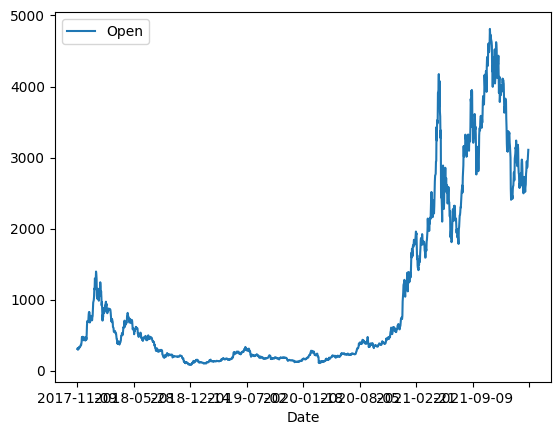

In [8]:
df1.plot()

# Feature Creation

In [9]:
df1.index = pd.to_datetime(df1.index)

In [10]:
def create_features(df1):

  df1['month'] = df1.index.month
  df1['year'] = df1.index.year
  df1['dayofyear'] = df1.index.dayofyear
  return df1



In [11]:
df1 = create_features(df1)

In [12]:
df1

,Open,month,year,dayofyear
Date,,,,
2017-11-09,308.644989,11,2017,313
2017-11-10,320.670990,11,2017,314
2017-11-11,298.585999,11,2017,315
2017-11-12,314.690002,11,2017,316
2017-11-13,307.024994,11,2017,317
...,...,...,...,...
2022-03-21,2860.103271,3,2022,80
2022-03-22,2897.774170,3,2022,81
2022-03-23,2973.145020,3,2022,82


In [13]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# train_test

In [14]:
df1 = df1.reset_index('Date')

In [15]:
train = df1.iloc[:-200]
test = df1.iloc[-200:]

In [16]:
train.shape

(1398, 5)

In [17]:
test.shape

(200, 5)

In [18]:
train

,Date,Open,month,year,dayofyear
0,2017-11-09,308.644989,11,2017,313
1,2017-11-10,320.670990,11,2017,314
2,2017-11-11,298.585999,11,2017,315
3,2017-11-12,314.690002,11,2017,316
4,2017-11-13,307.024994,11,2017,317
...,...,...,...,...,...
1393,2021-09-02,3825.027832,9,2021,245
1394,2021-09-03,3787.486572,9,2021,246
1395,2021-09-04,3937.910156,9,2021,247
1396,2021-09-05,3886.331055,9,2021,248


In [19]:
Features =['month', 'year', 'dayofyear']
Target = ['Open']

In [20]:
X_train = train[Features]
Y_train = train[Target]
X_test = test[Features]
Y_test = test[Target]

In [21]:
model = xgb.XGBRegressor(n_estimators=1000)
model.fit(X_train, Y_train, eval_set=[(X_train, Y_train),(X_test, Y_test)], verbose = 100)

[0]	validation_0-rmse:755.66026	validation_1-rmse:2798.30795
[100]	validation_0-rmse:10.13748	validation_1-rmse:1050.86634
[200]	validation_0-rmse:5.48723	validation_1-rmse:1050.87713
[300]	validation_0-rmse:3.21984	validation_1-rmse:1050.91624
[400]	validation_0-rmse:1.99826	validation_1-rmse:1050.98676
[500]	validation_0-rmse:1.33898	validation_1-rmse:1050.99491
[600]	validation_0-rmse:0.87382	validation_1-rmse:1051.01153
[700]	validation_0-rmse:0.62593	validation_1-rmse:1051.01521
[800]	validation_0-rmse:0.41442	validation_1-rmse:1051.01421
[900]	validation_0-rmse:0.28121	validation_1-rmse:1051.01467
[999]	validation_0-rmse:0.19284	validation_1-rmse:1051.01592


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [22]:
pred = model.predict(X_test)

In [23]:
pred

array([3904.7827 , 3921.8547 , 3921.6147 , 3906.837  , 3920.349  ,
       3935.698  , 3942.0835 , 3946.0664 , 3925.2283 , 3936.2136 ,
       3924.172  , 3925.2253 , 3941.3645 , 3936.3948 , 3937.7993 ,
       3923.4468 , 3902.1694 , 3907.8433 , 3889.7354 , 3918.062  ,
       3920.5728 , 3921.5117 , 3924.2258 , 3920.7905 , 3926.1191 ,
       3926.4968 , 3919.3965 , 3913.299  , 3913.7024 , 3919.769  ,
       3920.8833 , 3908.0847 , 3909.0676 , 3912.563  , 3926.745  ,
       3924.9275 , 3928.9158 , 3940.9097 , 3936.1006 , 3933.208  ,
       3931.6096 , 3920.2673 , 3922.7095 , 3932.3003 , 3933.6892 ,
       3923.1821 , 3936.9348 , 3946.4553 , 3942.3372 , 3944.879  ,
       3938.7456 , 3926.6028 , 3936.273  , 3921.505  , 3919.2607 ,
       3919.1606 , 3919.1428 , 3928.7957 , 3915.7903 , 3920.1995 ,
       3930.9995 , 3942.9482 , 3942.5442 , 3924.0054 , 3941.466  ,
       3932.352  , 3937.5515 , 3920.3057 , 3918.4163 , 3931.8418 ,
       3917.3975 , 3904.9607 , 3921.7695 , 3937.4355 , 3936.77

In [24]:
x = pd.to_datetime(df['Date'])
x=x.iloc[-200:]
x = x.transpose()

In [25]:
pred

array([3904.7827 , 3921.8547 , 3921.6147 , 3906.837  , 3920.349  ,
       3935.698  , 3942.0835 , 3946.0664 , 3925.2283 , 3936.2136 ,
       3924.172  , 3925.2253 , 3941.3645 , 3936.3948 , 3937.7993 ,
       3923.4468 , 3902.1694 , 3907.8433 , 3889.7354 , 3918.062  ,
       3920.5728 , 3921.5117 , 3924.2258 , 3920.7905 , 3926.1191 ,
       3926.4968 , 3919.3965 , 3913.299  , 3913.7024 , 3919.769  ,
       3920.8833 , 3908.0847 , 3909.0676 , 3912.563  , 3926.745  ,
       3924.9275 , 3928.9158 , 3940.9097 , 3936.1006 , 3933.208  ,
       3931.6096 , 3920.2673 , 3922.7095 , 3932.3003 , 3933.6892 ,
       3923.1821 , 3936.9348 , 3946.4553 , 3942.3372 , 3944.879  ,
       3938.7456 , 3926.6028 , 3936.273  , 3921.505  , 3919.2607 ,
       3919.1606 , 3919.1428 , 3928.7957 , 3915.7903 , 3920.1995 ,
       3930.9995 , 3942.9482 , 3942.5442 , 3924.0054 , 3941.466  ,
       3932.352  , 3937.5515 , 3920.3057 , 3918.4163 , 3931.8418 ,
       3917.3975 , 3904.9607 , 3921.7695 , 3937.4355 , 3936.77

In [26]:
(np.array(Y_test)).transpose()

array([[3926.527588, 3428.378174, 3452.54834 , 3425.564941, 3209.030518,
        3270.291748, 3407.471924, 3286.316406, 3431.217285, 3613.07373 ,
        3569.568115, 3397.422852, 3433.287842, 3329.670654, 2977.310547,
        2763.209229, 3077.974365, 3154.562012, 2930.884766, 2926.343018,
        3065.837891, 2928.963379, 2809.297607, 2852.558838, 3001.129395,
        3308.870361, 3390.767578, 3418.776367, 3381.784424, 3516.570313,
        3576.814453, 3587.832764, 3559.997803, 3575.020508, 3419.726807,
        3546.477783, 3492.753662, 3604.958984, 3790.154297, 3865.666504,
        3829.858887, 3847.72998 , 3747.162842, 3877.730957, 4161.713379,
        4055.686523, 3971.356445, 4171.855957, 4084.425781, 4217.337891,
        4132.17334 , 3924.81543 , 4288.686523, 4414.243652, 4322.744141,
        4288.217285, 4322.500977, 4589.68457 , 4604.678711, 4537.42334 ,
        4482.647949, 4523.981934, 4619.649414, 4810.071289, 4733.362793,
        4635.453613, 4724.306641, 4666.719238, 4648

In [27]:
Y_test.shape

(200, 1)

In [28]:
pred.shape

(200,)

In [29]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(
    go.Scatter(x=x, y= [3926.527588, 3428.378174, 3452.54834 , 3425.564941, 3209.030518,
        3270.291748, 3407.471924, 3286.316406, 3431.217285, 3613.07373 ,
        3569.568115, 3397.422852, 3433.287842, 3329.670654, 2977.310547,
        2763.209229, 3077.974365, 3154.562012, 2930.884766, 2926.343018,
        3065.837891, 2928.963379, 2809.297607, 2852.558838, 3001.129395,
        3308.870361, 3390.767578, 3418.776367, 3381.784424, 3516.570313,
        3576.814453, 3587.832764, 3559.997803, 3575.020508, 3419.726807,
        3546.477783, 3492.753662, 3604.958984, 3790.154297, 3865.666504,
        3829.858887, 3847.72998 , 3747.162842, 3877.730957, 4161.713379,
        4055.686523, 3971.356445, 4171.855957, 4084.425781, 4217.337891,
        4132.17334 , 3924.81543 , 4288.686523, 4414.243652, 4322.744141,
        4288.217285, 4322.500977, 4589.68457 , 4604.678711, 4537.42334 ,
        4482.647949, 4523.981934, 4619.649414, 4810.071289, 4733.362793,
        4635.453613, 4724.306641, 4666.719238, 4648.632813, 4627.09082 ,
        4570.478027, 4213.910645, 4287.802246, 3995.729492, 4298.350586,
        4412.195313, 4266.509277, 4089.68042 , 4340.036133, 4271.394531,
        4522.208984, 4042.999023, 4101.648926, 4296.946777, 4447.768066,
        4623.679688, 4586.333008, 4514.355957, 4227.762207, 4119.628906,
        4199.      , 4358.586914, 4311.674316, 4433.024902, 4113.588379,
        3909.667725, 4084.811279, 4136.359863, 3782.822754, 3862.251465,
        4020.415039, 3959.012451, 3880.291504, 3960.872314, 3923.695801,
        3938.463867, 4018.695801, 3981.96167 , 4111.345215, 4049.781982,
        4094.151611, 4064.746338, 4037.538086, 3797.436279, 3632.219727,
        3713.430176, 3683.047119, 3769.29834 , 3829.535645, 3761.361572,
        3794.269043, 3549.708984, 3417.837891, 3193.502441, 3091.696289,
        3157.570557, 3082.990967, 3238.449951, 3372.10498 , 3248.648682,
        3309.844238, 3330.387207, 3350.947266, 3212.287598, 3163.850342,
        3095.271729, 3002.956787, 2561.145264, 2406.924316, 2535.891113,
        2440.393555, 2455.579102, 2467.188477, 2421.646973, 2546.590576,
        2598.564941, 2603.263428, 2687.898926, 2791.958984, 2682.226074,
        2681.057617, 2984.446045, 3014.959717, 3057.422119, 3143.008545,
        3121.182617, 3240.113037, 3077.413086, 2927.386475, 2916.789551,
        2880.187744, 2933.729004, 3180.446777, 3126.858398, 2884.340576,
        2784.872803, 2763.756592, 2627.665527, 2572.898682, 2639.447021,
        2588.16626 , 2598.436279, 2764.989502, 2780.504395, 2621.172119,
        2919.775879, 2972.471924, 2950.156738, 2834.987305, 2618.473633,
        2664.943604, 2555.297607, 2497.721436, 2577.165283, 2729.116455,
        2608.27124 , 2559.660645, 2573.488037, 2518.486328, 2590.668945,
        2620.028564, 2771.964111, 2814.43457 , 2944.72168 , 2946.547607,
        2860.103271, 2897.77417 , 2973.14502 , 3031.060791, 3109.523438], name ='Open'))

fig.add_trace(
    go.Scatter(x=x, y=[3900.7415, 3900.7415, 3900.3145, 3900.3145, 3900.3145, 3900.3145,
       3900.3145, 3908.145 , 3908.145 , 3910.2905, 3910.2905, 3910.2905,
       3918.2244, 3915.404 , 3915.1614, 3915.1614, 3902.8916, 3902.8184,
       3890.8435, 3895.9246, 3895.9246, 3901.0903, 3901.0903, 3901.0903,
       3901.0903, 3901.0903, 3901.0903, 3900.8694, 3900.8694, 3900.8694,
       3900.8694, 3900.8694, 3900.8694, 3902.9778, 3909.5356, 3912.9543,
       3913.6577, 3913.6577, 3913.6577, 3913.6577, 3913.6577, 3912.777 ,
       3912.777 , 3912.777 , 3912.777 , 3912.777 , 3925.7642, 3937.9006,
       3937.9006, 3940.3262, 3940.3262, 3940.3262, 3940.3262, 3937.5757,
       3937.1292, 3938.1045, 3938.1045, 3938.1045, 3938.1045, 3940.08  ,
       3949.5095, 3951.26  , 3959.7793, 3959.7793, 3959.7793, 3959.7793,
       3959.7793, 3959.7793, 3959.7793, 3958.793 , 3971.281 , 3971.4585,
       3972.7036, 3972.835 , 3979.5427, 4011.949 , 4024.0667, 4063.5916,
       4063.5916, 4064.8914, 4064.8914, 4074.327 , 4048.764 , 4048.764 ,
       4048.3853, 4066.365 , 4102.0063, 4097.113 , 4097.113 , 4097.113 ,
       4088.434 , 4090.6692, 4090.6692, 4090.6692, 4082.063 , 4076.7612,
       4076.3335, 4076.3335, 4081.026 , 4083.6545, 4083.6545, 4083.6545,
       4112.2783, 4142.322 , 4151.512 , 4151.312 , 4139.5464, 4123.0415,
       4123.6636, 4099.2925, 4104.0693, 4122.228 , 4121.897 , 4179.783 ,
       4204.552 , 4204.552 ,  734.8934,  734.0285,  806.465 ,  969.2776,
       1041.5913, 1105.659 , 1192.9126, 1210.9413, 1210.9413, 1259.4883,
       1235.5708, 1101.2985, 1085.2543, 1155.8641, 1199.0522, 1186.6785,
       1239.488 , 1240.0756, 1268.0851, 1320.4932, 1352.6385, 1182.2521,
       1250.1505, 1250.1505, 1339.6704, 1326.8394, 1327.4008, 1308.0256,
       1364.947 , 1364.0011, 1361.4036, 1358.6621, 1361.4873, 1510.3153,
       1640.4766, 1631.248 , 1682.4935, 1682.7773, 1641.684 , 1726.1027,
       1760.9353, 1756.5753, 1756.5753, 1808.7722, 1806.6414, 1819.1368,
       1817.1401, 1817.1401, 1876.1218, 1918.9622, 1918.9622, 1889.9557,
       1870.3693, 1739.5039, 1623.4252, 1623.4252, 1508.983 , 1489.9578,
       1489.9578, 1455.385 , 1549.5575, 1543.7705, 1556.4193, 1556.4193,
       1556.4193, 1648.087 , 1723.4241, 1818.602 , 1818.602 , 1814.6823,
       1815.5745, 1815.5745, 1845.7251, 1836.5371, 1799.2906, 1799.2906,
       1788.1564, 1781.9193, 1781.3173, 1781.3173, 1777.7849, 1726.6366,
       1722.1615, 1637.0612], name ='Predicted_XGB(Open)'))

fig.show()